In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from PIL import Image
import tensorflow as tf
import joblib

In [2]:
# import model
with open('class_names.pkl','rb') as file_1:
  class_names = joblib.load(file_1)

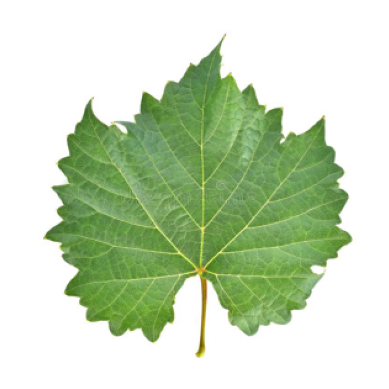

1/1 [==============================] - 0s 112ms/step
This image most likely belongs to Healthy with a 66.87 percent confidence.


In [7]:
# Load the trained model
model = keras.models.load_model(r'D:\Hacktiv8\Milestone\Milestone 5\best_model.h5')

# Define the target image size
img_height, img_width = 300, 300

# Upload the image file
uploaded_file = (r'D:\Hacktiv8\Milestone\Milestone 5\pict_infer.jpg')

# Load and display the image
img = Image.open(uploaded_file).resize((img_height, img_width))
plt.imshow(img)
plt.axis('off')
plt.show()

img1 = keras.preprocessing.image.load_img(
    uploaded_file, target_size=(300,300))

img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)